In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
active_wallets = pd.read_csv('../../active_wallets.csv',sep=':|\s+|"',engine='python',names=['fist_Na','id','from_address','to_address','contract_type','contract_name','tx_count','last_Na'],skiprows=1,usecols=range(1,7))
active_wallets[:3]

,id,from_address,to_address,contract_type,contract_name,tx_count
0,13,0xadd2f28b087afca908a06affcafeb57cecb3de4a,0x2a0c0dbecc7e4d658f48e01e3fa353f44050c208,dex,idex,0
1,18,0xdf09dda2982f12c144a932d3d14b7edeace5a984,0x2a0c0dbecc7e4d658f48e01e3fa353f44050c208,dex,idex,5
2,20,0xb6d7ffe4446f95e6026ca0d5c6700672fd7cc7a5,0x2a0c0dbecc7e4d658f48e01e3fa353f44050c208,dex,idex,8


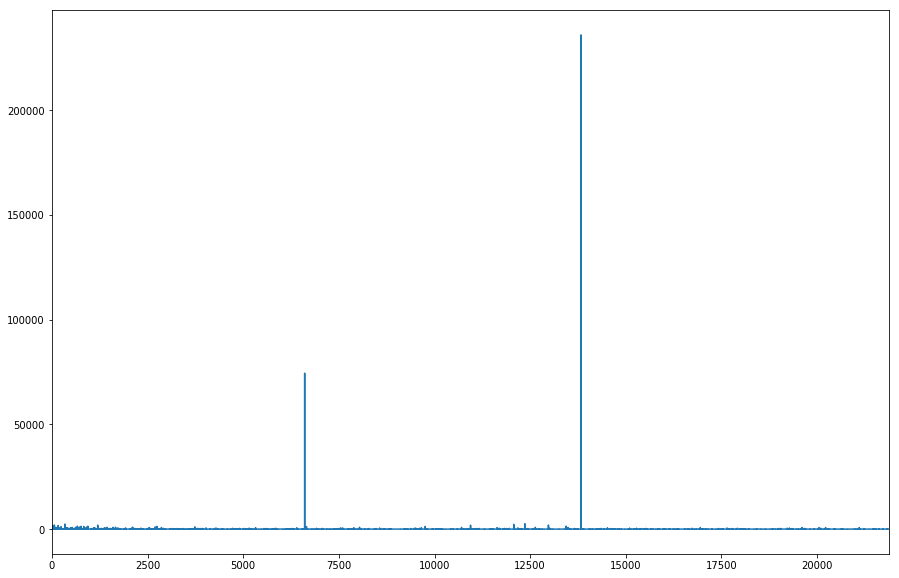

In [4]:
active_wallets['tx_count'].plot(figsize=(15,10), x='tx_count', y='number of accounts')
plt.show()

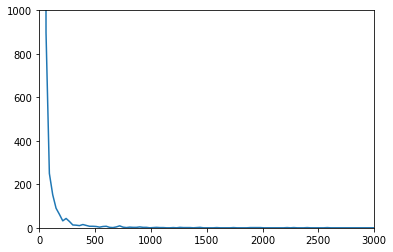

           id                                from_address  \
6606   101897  0x5e032243d507c743b061ef021e2ec7fcc6d3ab89   
13828  262687  0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98   

                                       to_address contract_type contract_name  \
6606   0x2a0c0dbecc7e4d658f48e01e3fa353f44050c208           dex          idex   
13828  0x2a0c0dbecc7e4d658f48e01e3fa353f44050c208           dex          idex   

       tx_count  
6606      74469  
13828    235998  
80
('total', 21880)
(1, 2763)
(2, 3313)
(3, 2194)
(4, 1568)
(5, 1249)
(6, 924)
(7, 753)
(8, 564)
(9, 550)


In [14]:
'''
plt.hist(active_wallets['tx_count'], color='blue', edgecolor='black', bins=int(180/1))
plt.tight_layout()
plt.show()
'''

hist, bin_edges = np.histogram(active_wallets['tx_count'], bins = 100, range=(0,3000))
plt.plot(bin_edges[1:], hist)
plt.ylim((0,1000))
plt.xlim((0,3000))
plt.show()

print(active_wallets.loc[active_wallets['tx_count'] > 3000])
print(len(active_wallets.loc[active_wallets['tx_count'] > 500]))

print('total', len(active_wallets))

for i in range(1,10):
    print(i, len(active_wallets.loc[active_wallets['tx_count'] == i]))

In [44]:
print(numpy.mean(active_wallets['tx_count']))

28.8789305302


In [8]:
'''
chunkSize = 1000
chunkNum = 60

transactions_chunk = pd.read_csv('../../transactions.csv',sep='\s+|"',engine='python',chunksize=chunkSize,skiprows=1,names=['first_Na','id','hash','nonce','block_hash','block_number','transaction_index','from_address','to_address','value','gas','gas_price','input','block_timestamp','Last_Na'],usecols=range(1,14))
#print(transactions_chunk.get_chunk(3))

transactions_test = pd.read_csv('./transactions.csv',sep=';',engine='python',chunksize=100)

active_accounts = pd.DataFrame(columns=['address','tx_count'])

i=0
for chunk in transactions_chunk:
    if(i>=chunkNum):
        break
    i+=1
    
    for index, row in chunk.loc[chunk['to_address'] == '0x2a0c0dbecc7e4d658f48e01e3fa353f44050c208'].iterrows():
        if len(active_accounts.loc[active_accounts['address'] == row['from_address']]) == 0:
            active_accounts = active_accounts.append(pd.DataFrame(data=[[row['from_address'],0]], columns=['address','tx_count']), ignore_index=True)
            
active_accounts[:10]
'''


,address,tx_count
0,0xa7a7899d944fe658c4b0a1803bab2f490bd3849e,0
1,0xadd2f28b087afca908a06affcafeb57cecb3de4a,0
2,0xdf09dda2982f12c144a932d3d14b7edeace5a984,0
3,0xb6d7ffe4446f95e6026ca0d5c6700672fd7cc7a5,0
4,0x90d1e63fd61bedee4447ca9398d0d15cdbd4dd42,0
5,0x294bce6596bcb9881fa4740aa66d3b9a90a944d9,0
6,0x523e025e9194daebafa27905be31cfc54538bb08,0
7,0x71a5aad72f5d1b4ac9dcb2ffe2e4c45ec76a4703,0
8,0x55844d0fd6f6255e03852a50e3176bcb7e0bab78,0
9,0x82712846b72fd7fdbd869f5355166934b1ca2749,0


In [9]:
'''
transactions_chunk = pd.read_csv('../../transactions.csv',sep='\s+|"',engine='python',chunksize=chunkSize,skiprows=1,names=['first_Na','id','hash','nonce','block_hash','block_number','transaction_index','from_address','to_address','value','gas','gas_price','input','block_timestamp','Last_Na'],usecols=range(1,14))

i=0
for chunk in transactions_chunk:
    if(i>=chunkNum):
        break
    i+=1
    
    for index, row in active_accounts.iterrows():
        row['tx_count'] += len(chunk.loc[chunk['from_address'] == row['address']])
        
active_accounts[:10]
'''

,address,tx_count
0,0xa7a7899d944fe658c4b0a1803bab2f490bd3849e,1079
1,0xadd2f28b087afca908a06affcafeb57cecb3de4a,1
2,0xdf09dda2982f12c144a932d3d14b7edeace5a984,1
3,0xb6d7ffe4446f95e6026ca0d5c6700672fd7cc7a5,1
4,0x90d1e63fd61bedee4447ca9398d0d15cdbd4dd42,13
5,0x294bce6596bcb9881fa4740aa66d3b9a90a944d9,1
6,0x523e025e9194daebafa27905be31cfc54538bb08,1
7,0x71a5aad72f5d1b4ac9dcb2ffe2e4c45ec76a4703,3
8,0x55844d0fd6f6255e03852a50e3176bcb7e0bab78,3
9,0x82712846b72fd7fdbd869f5355166934b1ca2749,1


In [10]:
#active_accounts['tx_count'].plot(figsize=(15,10))

In [11]:
'''
print(numpy.mean(active_accounts['tx_count']))
'''

8.88888888888889


In [12]:
'''
active_accounts.to_csv('active_accounts.csv')
'''